<a href="https://colab.research.google.com/github/captainfaraz/INSE6220/blob/main/My_project_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [1]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The urinary biomarkers for pancreatic cancer dataset that is used for this project is obtained from Kaggle. A series of biomarkers from the urine of three groups of patients are gathered:


1.   Healthy controls
2.   Patients with non-cancerous pancreatic conditions, like chronic pancreatitis
3. Patients with pancreatic ductal adenocarcinoma

The key features are four urinary biomarkers: creatinine, LYVE1, REG1B, and TFF1:

1.   Creatinine is a protein that is often used as an indicator of kidney function.
2.   YVLE1 is lymphatic vessel endothelial hyaluronan receptor 1, a protein that may play a role in tumor metastasis
3. REG1B is a protein that may be associated with pancreas regeneration
4. TFF1 is trefoil factor 1, which may be related to regeneration and repair of the urinary tract

Age is also included in the dataset, may also play a role in who gets pancreatic cancer. 



In [5]:
#load data
df = pd.read_csv('https://raw.githubusercontent.com/captainfaraz/INSE6220/main/Debernardi%20et%20al%202020%20data.csv')
df = df[['age', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'diagnosis']]
df.head(n=25)

age  creatinine     LYVE1       REG1B        TFF1  diagnosis
0    33     1.83222  0.893219   52.948840  654.282174          1
1    81     0.97266  2.037585   94.467030  209.488250          1
2    51     0.78039  0.145589  102.366000  461.141000          1
3    61     0.70122  0.002805   60.579000  142.950000          1
4    62     0.21489  0.000860   65.540000   41.088000          1
5    53     0.84825  0.003393   62.126000   59.793000          1
6    70     0.62205  0.174381  152.277000  117.516000          1
7    58     0.89349  0.003574    3.730000   40.294000          1
8    59     0.48633  0.001945    7.021000   26.782000          1
9    56     0.61074  0.278778   83.928000   19.185000          1
10   77     0.29406  0.001176    6.218000   28.297000          1
11   71     1.05183  0.860337  243.082000  608.284000          1
12   49     0.85956  1.416314  151.830770   74.189903          1
13   53     1.91139  1.516773  150.890000  590.686000          1
14   56     0.91611  0.599645   93.811000   93.576000          1
15   60     0.50895  0.002036   24.366000   19.698000          1
16   69     0.41847  0.001674   17.102000    0.032641          1
17   60     0.80301  0.003212    3.588000   30.071000          1
18   55     1.28934  2.285351   67.468000  269.805000          1
19   28     0.50895  0.583010   13.619060  267.193539          1
20   54     1.24410  0.004976    5.507350  193.145661          1
21   50     0.95004  0.003800   56.399133  192.258882          1
22   40     0.76908  0.653984   14.607579  341.267453          1
23   74     0.31668  0.583010   25.520350  146.588598          1
24   63     0.75777  2.440180   21.229480  109.421150          1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         590 non-null    int64  
 1   creatinine  590 non-null    float64
 2   LYVE1       590 non-null    float64
 3   REG1B       590 non-null    float64
 4   TFF1        590 non-null    float64
 5   diagnosis   590 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 27.8 KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

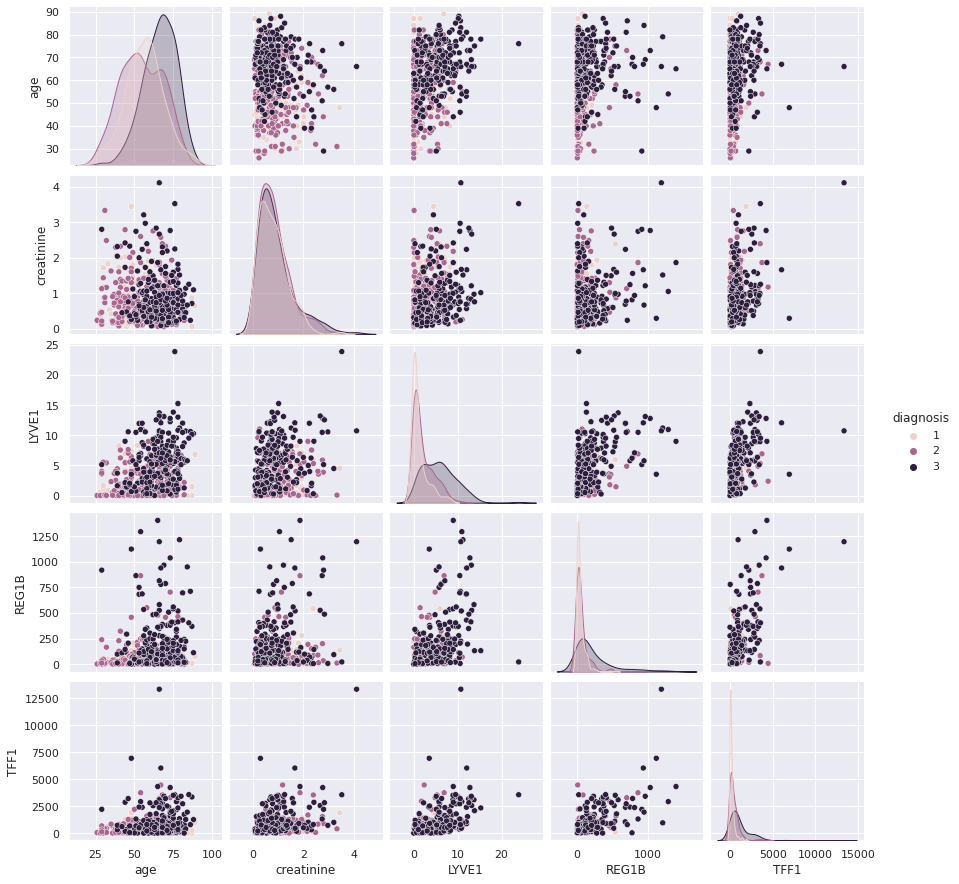

In [ ]:
sns.pairplot(df, hue='diagnosis')
plt.show()

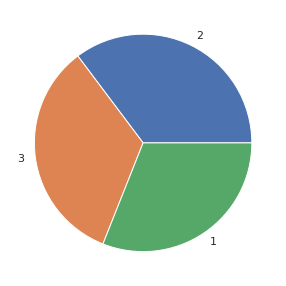

In [7]:
y =df['diagnosis']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [8]:
X = df.drop(columns=['diagnosis'])
X.head(10)

age  creatinine     LYVE1      REG1B        TFF1
0   33     1.83222  0.893219   52.94884  654.282174
1   81     0.97266  2.037585   94.46703  209.488250
2   51     0.78039  0.145589  102.36600  461.141000
3   61     0.70122  0.002805   60.57900  142.950000
4   62     0.21489  0.000860   65.54000   41.088000
5   53     0.84825  0.003393   62.12600   59.793000
6   70     0.62205  0.174381  152.27700  117.516000
7   58     0.89349  0.003574    3.73000   40.294000
8   59     0.48633  0.001945    7.02100   26.782000
9   56     0.61074  0.278778   83.92800   19.185000

In [10]:
X.describe().transpose()

count        mean          std        min        25%         50%  \
age         590.0   59.079661    13.109520  26.000000  50.000000   60.000000   
creatinine  590.0    0.855383     0.639028   0.056550   0.373230    0.723840   
LYVE1       590.0    3.063530     3.438796   0.000129   0.167179    1.649862   
REG1B       590.0  111.774090   196.267110   0.001104  10.757216   34.303353   
TFF1        590.0  597.868722  1010.477245   0.005293  43.961000  259.873974   

                   75%           max  
age          69.000000     89.000000  
creatinine    1.139482      4.116840  
LYVE1         5.205037     23.890323  
REG1B       122.741013   1403.897600  
TFF1        742.736000  13344.300000

**Standardize the Data**

In [9]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

age  creatinine     LYVE1     REG1B      TFF1
0 -1.991056    1.529927 -0.631661 -0.299975  0.055876
1  1.673512    0.183680 -0.298597 -0.088256 -0.384680
2 -0.616843   -0.117454 -0.849256 -0.047976 -0.135425
3  0.146609   -0.241451 -0.890812 -0.261065 -0.450584
4  0.222954   -1.003143 -0.891378 -0.235767 -0.551475
5 -0.464153   -0.011172 -0.890641 -0.253176 -0.532948
6  0.833715   -0.365447 -0.840876  0.206541 -0.475776
7 -0.082427    0.059683 -0.890588 -0.550962 -0.552262
8 -0.006082   -0.578012 -0.891062 -0.534180 -0.565645
9 -0.235117   -0.383161 -0.810491 -0.141999 -0.573170

In [13]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
age         590.0 -2.408619e-17  1.000849 -2.525472 -0.693188  0.070263   
creatinine  590.0  1.806465e-17  1.000849 -1.251136 -0.755150 -0.206023   
LYVE1       590.0  0.000000e+00  1.000849 -0.891591 -0.842972 -0.411443   
REG1B       590.0  2.408619e-17  1.000849 -0.569977 -0.515128 -0.395056   
TFF1        590.0  0.000000e+00  1.000849 -0.592166 -0.548630 -0.334774   

                 75%        max  
age         0.757370   2.284273  
creatinine  0.444958   5.108109  
LYVE1       0.623278   6.061559  
REG1B       0.055925   6.589081  
TFF1        0.143487  12.624972

**Observations and variables**

In [10]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

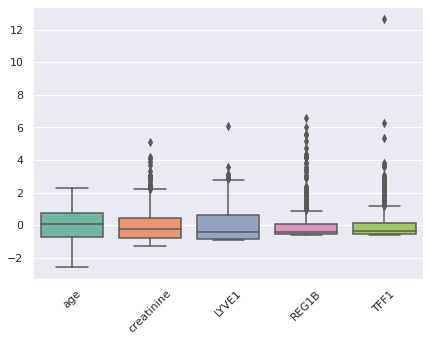

In [13]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

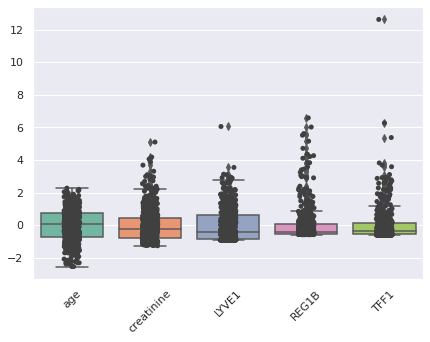

In [14]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

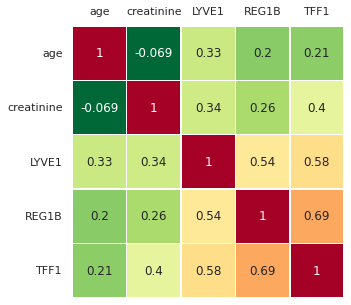

In [13]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

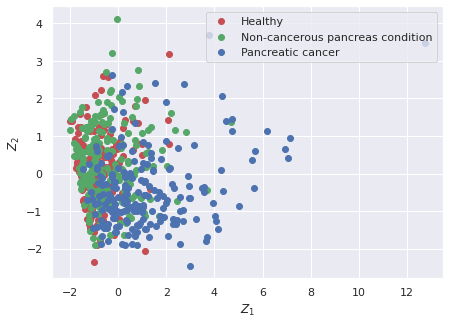

In [16]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Healthy)->0,  2(Kama)->1, 3(Cancer)->2
idx_healthy = np.where(y == 1)
idx_non_cancer_condition = np.where(y == 2)
idx_cancer = np.where(y == 3)

plt. figure()
plt.scatter(Z[idx_healthy,0], Z[idx_healthy,1], c='r', label='Healthy')
plt.scatter(Z[idx_non_cancer_condition,0], Z[idx_non_cancer_condition,1], c='g', label='Non-cancerous pancreas condition')
plt.scatter(Z[idx_cancer,0], Z[idx_cancer,1], c='b', label='Pancreatic cancer')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')


**Eigenvectors**

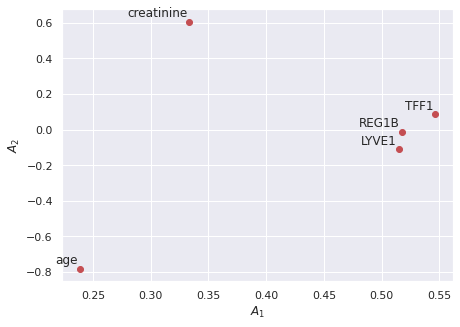

In [17]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

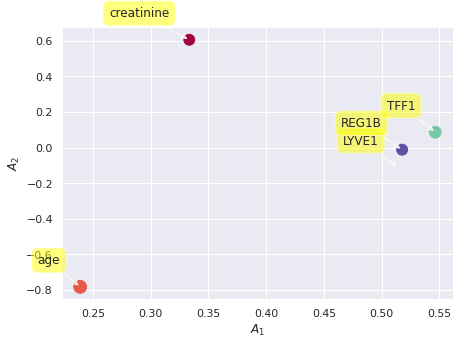

In [19]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

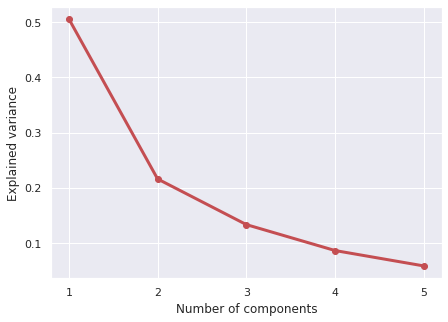

In [20]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

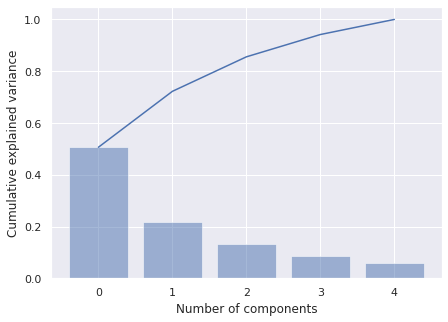

In [21]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

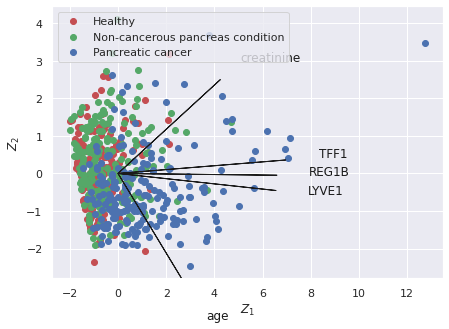

In [22]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_healthy,0], Z[idx_healthy,1], c='r', label='Healthy')
plt.scatter(Z[idx_non_cancer_condition,0], Z[idx_non_cancer_condition,1], c='g', label='Non-cancerous pancreas condition')
plt.scatter(Z[idx_cancer,0], Z[idx_cancer,1], c='b', label='Pancreatic cancer')
plt.legend(loc='upper left')

##**Using PCA Library**

In [14]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [18]:
out['PC']

PC1       PC2       PC3       PC4       PC5
0   -0.415650  2.563842 -0.123582  0.181058  0.054553
1    0.051586 -1.197833 -1.005705  0.715468 -0.344248
2   -0.722619  0.493916  0.426769  0.433313 -0.012011
3   -0.885447 -0.199134 -0.032642  0.551419 -0.125384
4   -1.163513 -0.729757  0.420102  0.375498 -0.080489
..        ...       ...       ...       ...       ...
585  0.664313 -0.988278 -0.037633 -0.841058 -0.144259
586  0.569493 -0.902361 -0.982062 -1.200037 -0.008672
587  1.467362  0.089507 -0.401728 -0.637330 -0.796676
588  1.627404 -0.655900 -0.993697 -0.530724 -0.423539
589  2.943776 -0.334998 -0.270335  0.114682 -0.180029

[590 rows x 5 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [590] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [590] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8fb41288b0>)

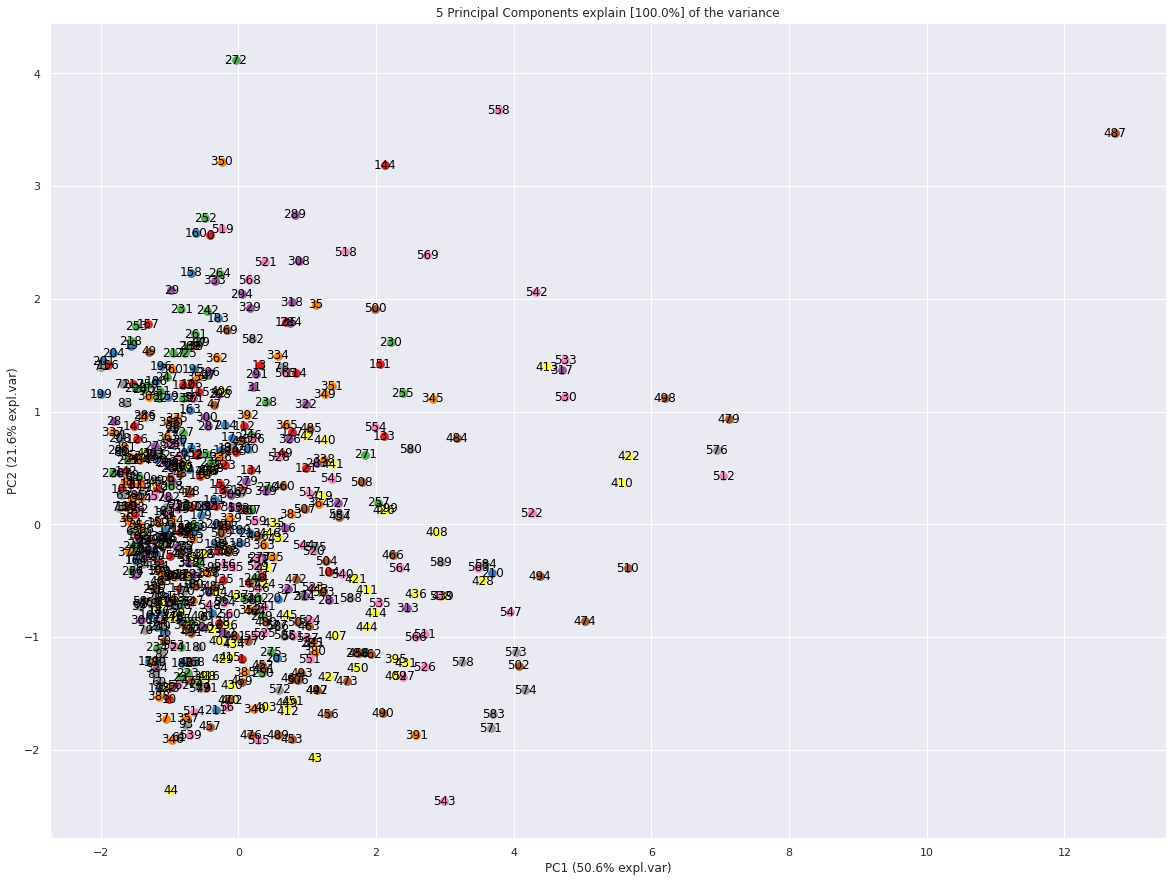

In [19]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [27]:
A = out['loadings'].T

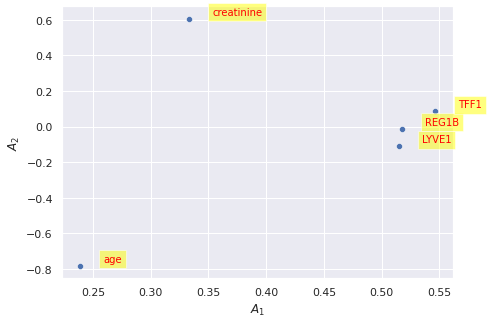

In [28]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

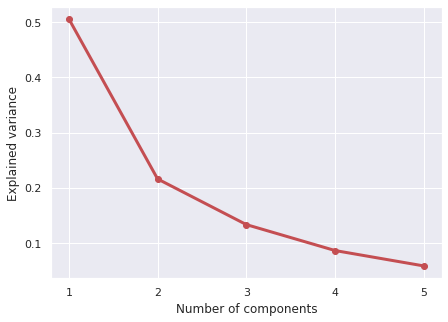

In [29]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

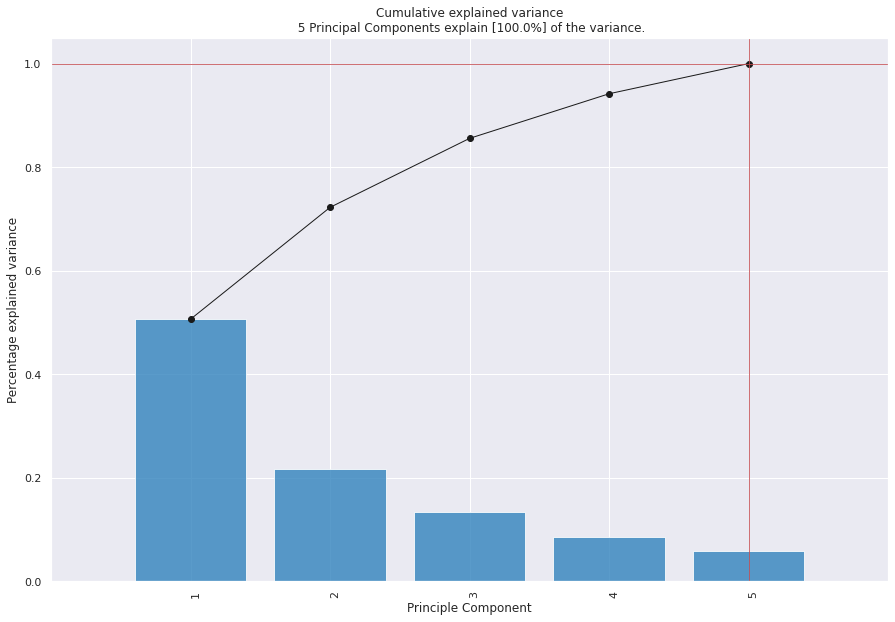

<Figure size 504x360 with 0 Axes>

In [30]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [590] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [590] unique colors! Available unique colors: [9].


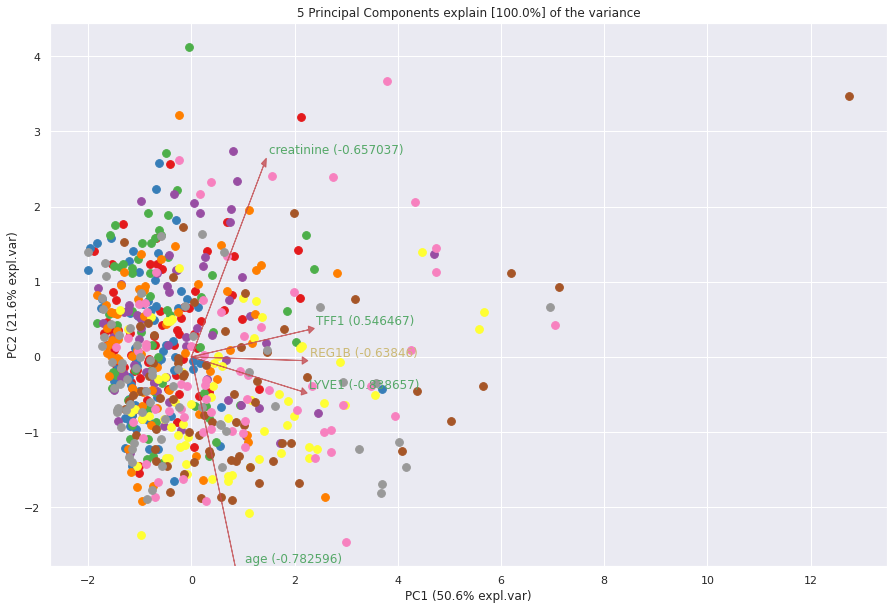

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f754c4b74f0>)

In [31]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [590] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [590] unique colors! Available unique colors: [9].


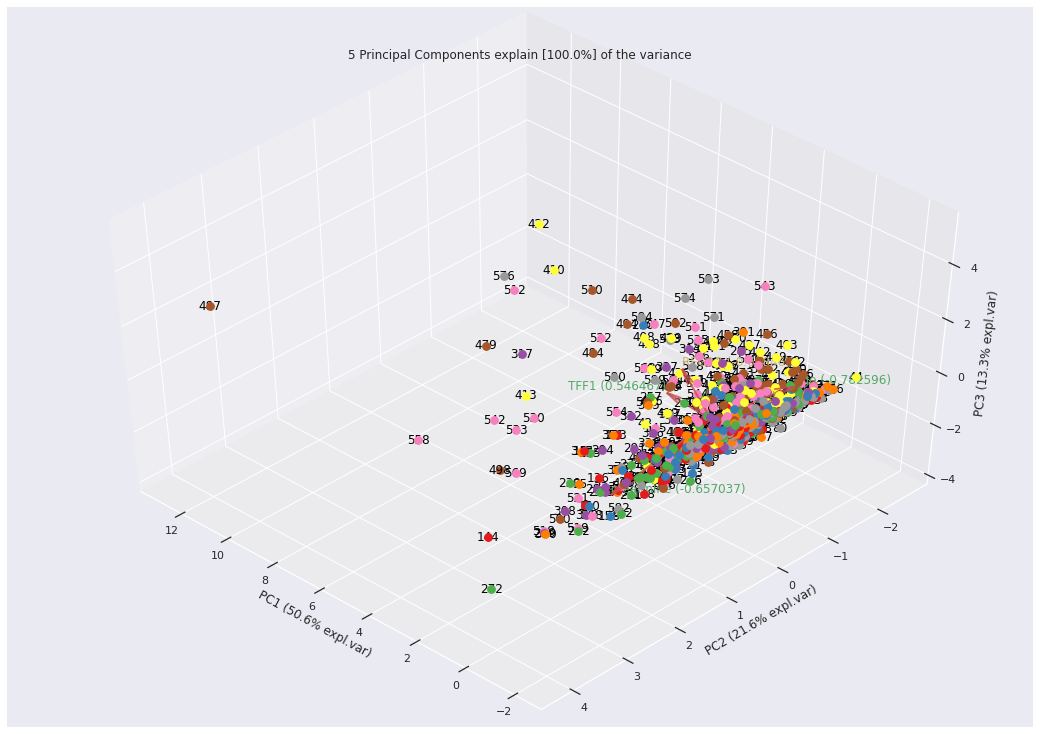

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f754acf8c40>)

In [32]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

In [11]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [12]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (531, 6)
Unseen Data For Predictions: (59, 6)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
#pip install --user -U scikit-learn==0.23.2

In [13]:
from pycaret.classification import *
clf = setup(data=data, target='diagnosis', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target         diagnosis
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (531, 6)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (371, 5)
12                    Transformed Test Set          (160, 5)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              6485
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='diagnosis',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing All Models**

In [14]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.6549  0.8225  0.6576  0.6652   
rf               Random Forest Classifier    0.6336  0.8108  0.6344  0.6455   
lr                    Logistic Regression    0.6037  0.7787  0.6066  0.6166   
ridge                    Ridge Classifier    0.5988  0.0000  0.5982  0.6004   
lda          Linear Discriminant Analysis    0.5878  0.7744  0.5855  0.6013   
lightgbm  Light Gradient Boosting Machine    0.5878  0.7883  0.5895  0.5998   
gbc          Gradient Boosting Classifier    0.5849  0.8023  0.5851  0.5875   
qda       Quadratic Discriminant Analysis    0.5255  0.7293  0.5361  0.5479   
ada                  Ada Boost Classifier    0.5172  0.7212  0.5157  0.5251   
nb                            Naive Bayes    0.5147  0.7100  0.5260  0.5274   
dt               Decision Tree Classifier    0.5071  0.6288  0.5057  0.5162   
svm                   SVM - Linear Kernel    0.5013  0.0000  0.5004  0.4441   
knn                K Neighbors Classifier    0.4908  0.6525  0.4938  0.4962   
dummy                    Dummy Classifier    0.3504  0.5000  0.3333  0.1228   

              F1   Kappa     MCC  TT (Sec)  
et        0.6467  0.4816  0.4928     0.207  
rf        0.6242  0.4490  0.4619     0.255  
lr        0.6013  0.4056  0.4122     1.340  
ridge     0.5933  0.3958  0.3995     0.014  
lda       0.5867  0.3790  0.3838     0.016  
lightgbm  0.5831  0.3816  0.3891     0.152  
gbc       0.5753  0.3759  0.3834     0.632  
qda       0.4996  0.2940  0.3207     0.016  
ada       0.5062  0.2717  0.2782     0.112  
nb        0.4811  0.2794  0.3130     0.030  
dt        0.5061  0.2582  0.2613     0.016  
svm       0.4405  0.2480  0.2943     0.019  
knn       0.4825  0.2374  0.2433     0.047  
dummy     0.1819  0.0000  0.0000     0.017

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [15]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [16]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.3684  0.5246  0.3654  0.4006  0.3756  0.0490  0.0505
1       0.4324  0.5733  0.4338  0.4363  0.4322  0.1480  0.1487
2       0.5676  0.6717  0.5641  0.5881  0.5632  0.3466  0.3579
3       0.5676  0.6742  0.5662  0.5672  0.5628  0.3495  0.3522
4       0.5405  0.6558  0.5406  0.5438  0.5416  0.3111  0.3114
5       0.6216  0.7150  0.6261  0.6297  0.6207  0.4326  0.4360
6       0.4324  0.5708  0.4338  0.4518  0.4391  0.1452  0.1464
7       0.4595  0.5897  0.4499  0.4788  0.4600  0.1796  0.1840
8       0.5405  0.6587  0.5408  0.5382  0.5352  0.3133  0.3164
9       0.5405  0.6538  0.5361  0.5279  0.5303  0.3073  0.3097
Mean    0.5071  0.6288  0.5057  0.5162  0.5061  0.2582  0.2613
SD      0.0751  0.0569  0.0762  0.0688  0.0717  0.1139  0.1150

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [17]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [18]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5263  0.7036  0.5256  0.5104  0.5163  0.2890  0.2902
1       0.6757  0.8420  0.6752  0.6849  0.6777  0.5126  0.5143
2       0.5405  0.7155  0.5449  0.5155  0.5235  0.3118  0.3142
3       0.4595  0.6893  0.4573  0.4898  0.4626  0.1832  0.1890
4       0.5405  0.7043  0.5449  0.5419  0.5393  0.3118  0.3132
5       0.6216  0.8094  0.6239  0.6541  0.6254  0.4314  0.4377
6       0.5135  0.6788  0.5171  0.5186  0.5156  0.2689  0.2692
7       0.6216  0.7074  0.6177  0.6216  0.6185  0.4283  0.4302
8       0.5946  0.8036  0.6014  0.6622  0.6060  0.3967  0.4079
9       0.5946  0.6745  0.5967  0.6021  0.5875  0.3874  0.3958
Mean    0.5688  0.7328  0.5705  0.5801  0.5672  0.3521  0.3562
SD      0.0606  0.0580  0.0606  0.0692  0.0625  0.0915  0.0921

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [19]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [20]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [21]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [22]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4211  0.6092  0.4252  0.4289  0.4185  0.1346  0.1364
1       0.4865  0.6674  0.4872  0.4954  0.4866  0.2275  0.2292
2       0.4595  0.6454  0.4615  0.4497  0.4529  0.1895  0.1901
3       0.4865  0.6198  0.4915  0.5011  0.4852  0.2317  0.2366
4       0.5405  0.7138  0.5385  0.5743  0.5411  0.3095  0.3170
5       0.5135  0.7331  0.5192  0.5573  0.5119  0.2705  0.2802
6       0.5946  0.6678  0.6026  0.5827  0.5737  0.3948  0.4059
7       0.4865  0.6799  0.4755  0.4830  0.4843  0.2258  0.2260
8       0.5135  0.6621  0.5245  0.5380  0.5034  0.2808  0.2967
9       0.4054  0.5264  0.4126  0.3519  0.3670  0.1094  0.1144
Mean    0.4908  0.6525  0.4938  0.4962  0.4825  0.2374  0.2433
SD      0.0524  0.0552  0.0530  0.0684  0.0560  0.0790  0.0822

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [23]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.4474  0.7065  0.4551  0.4265  0.4171  0.1773  0.1876
1       0.5946  0.7750  0.6004  0.5865  0.5852  0.3934  0.3974
2       0.5135  0.6558  0.5214  0.4878  0.4950  0.2729  0.2766
3       0.6216  0.7868  0.6261  0.6200  0.6188  0.4326  0.4341
4       0.6216  0.7461  0.6239  0.6683  0.6247  0.4351  0.4474
5       0.5946  0.7575  0.6004  0.6142  0.5756  0.3948  0.4176
6       0.6486  0.7986  0.6538  0.6713  0.6468  0.4749  0.4861
7       0.4595  0.7145  0.4592  0.4331  0.4222  0.1850  0.1979
8       0.5405  0.7481  0.5594  0.5994  0.5215  0.3251  0.3615
9       0.3784  0.5890  0.4009  0.2843  0.3237  0.0750  0.0784
Mean    0.5420  0.7278  0.5501  0.5391  0.5231  0.3166  0.3284
SD      0.0854  0.0612  0.0822  0.1199  0.1017  0.1271  0.1289

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=45, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [24]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=45, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [25]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6316  0.7618  0.6303  0.6466  0.6363  0.4470  0.4489
1       0.5135  0.6735  0.5192  0.5150  0.5109  0.2713  0.2734
2       0.6486  0.8293  0.6474  0.6531  0.6489  0.4714  0.4730
3       0.6216  0.7699  0.6282  0.6051  0.6088  0.4339  0.4372
4       0.5946  0.7480  0.5983  0.5946  0.5946  0.3914  0.3914
5       0.6486  0.8766  0.6560  0.6766  0.6439  0.4755  0.4923
6       0.5676  0.7110  0.5705  0.5644  0.5654  0.3516  0.3520
7       0.5676  0.7821  0.5664  0.5748  0.5683  0.3466  0.3481
8       0.5946  0.8423  0.6061  0.6679  0.5988  0.4006  0.4233
9       0.6486  0.7920  0.6434  0.6684  0.6374  0.4667  0.4821
Mean    0.6037  0.7787  0.6066  0.6166  0.6013  0.4056  0.4122
SD      0.0425  0.0577  0.0414  0.0515  0.0415  0.0633  0.0667

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [26]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6316  0.7619  0.6303  0.6466  0.6363  0.4470  0.4489
1       0.5135  0.6768  0.5192  0.5150  0.5109  0.2713  0.2734
2       0.6757  0.8370  0.6752  0.6804  0.6772  0.5126  0.5132
3       0.6216  0.7677  0.6282  0.6051  0.6088  0.4339  0.4372
4       0.6216  0.7468  0.6261  0.6206  0.6205  0.4326  0.4331
5       0.7297  0.8811  0.7372  0.7838  0.7230  0.5969  0.6268
6       0.5405  0.7353  0.5449  0.5339  0.5356  0.3118  0.3128
7       0.5676  0.7800  0.5664  0.5748  0.5683  0.3466  0.3481
8       0.7027  0.8510  0.7133  0.7605  0.7049  0.5586  0.5781
9       0.6216  0.7888  0.6177  0.6172  0.6117  0.4283  0.4341
Mean    0.6226  0.7826  0.6259  0.6338  0.6197  0.4340  0.4406
SD      0.0652  0.0572  0.0664  0.0835  0.0658  0.0987  0.1058

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=6.718000000000001, class_weight={}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [27]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=6.718000000000001, class_weight={}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [50]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5789  0.7924  0.5748  0.5796  0.5788  0.3673  0.3677
1       0.6486  0.8329  0.6474  0.6626  0.6497  0.4714  0.4751
2       0.6216  0.8018  0.6218  0.6106  0.6016  0.4308  0.4401
3       0.5676  0.7998  0.5684  0.5810  0.5653  0.3487  0.3539
4       0.6757  0.8405  0.6731  0.6927  0.6709  0.5105  0.5228
5       0.7027  0.8306  0.7094  0.7432  0.6963  0.5562  0.5813
6       0.6216  0.7371  0.6261  0.6137  0.6155  0.4326  0.4341
7       0.6216  0.8254  0.6131  0.6480  0.6228  0.4257  0.4336
8       0.7027  0.8604  0.7179  0.7425  0.6865  0.5605  0.5943
9       0.5946  0.7874  0.5921  0.5812  0.5542  0.3861  0.4164
Mean    0.6336  0.8108  0.6344  0.6455  0.6242  0.4490  0.4619
SD      0.0457  0.0331  0.0497  0.0603  0.0479  0.0707  0.0777

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [51]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5789  0.7724  0.5769  0.6018  0.5865  0.3673  0.3700
1       0.6757  0.8286  0.6774  0.6799  0.6771  0.5126  0.5132
2       0.7027  0.8027  0.7030  0.6973  0.6928  0.5537  0.5593
3       0.5135  0.7503  0.5171  0.4955  0.4989  0.2697  0.2724
4       0.6216  0.8437  0.6218  0.6296  0.6238  0.4308  0.4322
5       0.7297  0.8339  0.7372  0.7566  0.7206  0.5965  0.6176
6       0.6216  0.7386  0.6261  0.6164  0.6164  0.4333  0.4352
7       0.6757  0.8183  0.6737  0.6951  0.6782  0.5088  0.5129
8       0.7027  0.8202  0.7133  0.7553  0.6873  0.5595  0.5913
9       0.5946  0.7614  0.5921  0.6389  0.5730  0.3847  0.4223
Mean    0.6417  0.7970  0.6438  0.6566  0.6355  0.4617  0.4726
SD      0.0639  0.0361  0.0656  0.0742  0.0650  0.0972  0.1010

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [52]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [53]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5789  0.7940  0.5812  0.5684  0.5693  0.3699  0.3734
1       0.5676  0.7782  0.5769  0.5387  0.5424  0.3544  0.3628
2       0.7027  0.8159  0.7073  0.7004  0.6959  0.5552  0.5595
3       0.5405  0.7571  0.5449  0.5135  0.5189  0.3111  0.3156
4       0.6486  0.8193  0.6517  0.6436  0.6454  0.4732  0.4737
5       0.6486  0.8883  0.6603  0.7205  0.6159  0.4777  0.5327
6       0.6486  0.7770  0.6538  0.6432  0.6398  0.4743  0.4790
7       0.6486  0.7941  0.6387  0.6767  0.6422  0.4656  0.4759
8       0.6486  0.8606  0.6573  0.6720  0.6436  0.4783  0.4934
9       0.6216  0.7885  0.6270  0.6143  0.5855  0.4295  0.4594
Mean    0.6255  0.8073  0.6299  0.6291  0.6099  0.4389  0.4525
SD      0.0463  0.0382  0.0460  0.0659  0.0518  0.0693  0.0737

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [54]:
tuned_best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [55]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [33]:
clf_pca = setup(data=data, target='diagnosis', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

INFO:logs:PyCaret Supervised Module
INFO:logs:ML Usecase: classification
INFO:logs:version 2.3.6
INFO:logs:Initializing setup()
INFO:logs:setup(target=diagnosis, ml_usecase=classification, available_plots={'parameter': 'Hyperparameters', 'auc': 'AUC', 'confusion_matrix': 'Confusion Matrix', 'threshold': 'Threshold', 'pr': 'Precision Recall', 'error': 'Prediction Error', 'class_report': 'Class Report', 'rfe': 'Feature Selection', 'learning': 'Learning Curve', 'manifold': 'Manifold Learning', 'calibration': 'Calibration Curve', 'vc': 'Validation Curve', 'dimension': 'Dimensions', 'feature': 'Feature Importance', 'feature_all': 'Feature Importance (All)', 'boundary': 'Decision Boundary', 'lift': 'Lift Chart', 'gain': 'Gain Chart', 'tree': 'Decision Tree', 'ks': 'KS Statistic Plot'}, train_size=0.7, test_data=None, preprocess=True, imputation_type=simple, iterative_imputation_iters=5, categorical_features=None, categorical_imputation=constant, categorical_iterative_imputer=lightgbm, ordina

IntProgress(value=0, description='Processing: ', max=3)

Initiated  . . . . . . . . . . . . . . . . . .            23:48:10
Status     . . . . . . . . . . . . . . . . . .  Preprocessing Data

INFO:logs:Importing libraries
INFO:logs:Copying data for preprocessing
INFO:logs:Declaring preprocessing parameters
INFO:logs:Creating preprocessing pipeline
INFO:logs:Preprocessing pipeline created successfully
ERROR:logs:(Process Exit): setup has been interupted with user command 'quit'. setup must rerun.
INFO:logs:Creating global containers
INFO:logs:Internal pipeline: Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False)


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

Data Type
age          Numeric
creatinine   Numeric
LYVE1        Numeric
REG1B        Numeric
TFF1         Numeric
diagnosis      Label

KeyboardInterrupt: ignored

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

In [ ]:
best_model_pca

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

In [ ]:
tuned_best_model_pca

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**



Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [62]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
print("Numpy version: ", np.__version__)

Numpy version:  1.21.6


In [64]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 7.6 MB/s 
     |████████████████████████████████| 25.3 MB 14.2 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [65]:
import shap

In [66]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  0.7014  0.5000  0.4765  0.4852  0.2503  0.2521
1       0.5946  0.7862  0.6004  0.5935  0.5828  0.3934  0.4018
2       0.5676  0.6912  0.5726  0.5477  0.5462  0.3530  0.3605
3       0.5676  0.7068  0.5726  0.5464  0.5522  0.3516  0.3543
4       0.4595  0.7009  0.4722  0.3581  0.4024  0.1948  0.2031
5       0.5676  0.7215  0.5705  0.5676  0.5676  0.3509  0.3509
6       0.3243  0.6214  0.3269  0.3401  0.3304 -0.0176 -0.0177
7       0.4865  0.7225  0.4848  0.4743  0.4750  0.2325  0.2359
8       0.6486  0.7599  0.6480  0.6771  0.6566  0.4737  0.4774
9       0.5135  0.6712  0.5152  0.4872  0.4961  0.2681  0.2708
Mean    0.5230  0.7083  0.5263  0.5068  0.5095  0.2851  0.2889
SD      0.0850  0.0429  0.0847  0.0978  0.0889  0.1283  0.1294

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [67]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5263  0.7648  0.5235  0.5158  0.5141  0.2882  0.2922
1       0.5676  0.7382  0.5748  0.5504  0.5553  0.3530  0.3557
2       0.5135  0.7286  0.5192  0.4918  0.4845  0.2737  0.2834
3       0.5946  0.7335  0.6026  0.5792  0.5622  0.3954  0.4118
4       0.5405  0.7548  0.5491  0.5148  0.5180  0.3141  0.3208
5       0.5946  0.7652  0.6026  0.6029  0.5789  0.3954  0.4094
6       0.6216  0.7083  0.6303  0.6116  0.5970  0.4357  0.4491
7       0.4865  0.7599  0.4802  0.4703  0.4767  0.2258  0.2265
8       0.5946  0.8024  0.6014  0.6272  0.5907  0.3994  0.4171
9       0.5405  0.7195  0.5408  0.4896  0.4957  0.3073  0.3230
Mean    0.5580  0.7475  0.5625  0.5453  0.5373  0.3388  0.3489
SD      0.0411  0.0261  0.0450  0.0538  0.0427  0.0639  0.0680

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


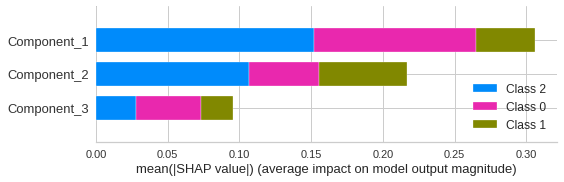

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [68]:
interpret_model(tuned_rf_pca, plot='summary')

**Visualize a single prediction**

In [69]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [70]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
